Task 1.1


In [9]:
import numpy as np

data = np.loadtxt('kc_house_data.csv', delimiter=',', dtype='str', skiprows=1) # ,dtype='str'

print(data)


[['"7129300520"' '"20141013T000000"' '221900' ... '-122.257' '1340'
  '5650']
 ['"6414100192"' '"20141209T000000"' '538000' ... '-122.319' '1690'
  '7639']
 ['"5631500400"' '"20150225T000000"' '180000' ... '-122.233' '2720'
  '8062']
 ...
 ['"1523300141"' '"20140623T000000"' '402101' ... '-122.299' '1020'
  '2007']
 ['"0291310100"' '"20150116T000000"' '400000' ... '-122.069' '1410'
  '1287']
 ['"1523300157"' '"20141015T000000"' '325000' ... '-122.299' '1020'
  '1357']]


Task 1.2

In [10]:
def gen_list_transformer(transformation):
    def transformer(ilist):
        return [transformation(el) for el in ilist]
    return transformer


square_of_list = gen_list_transformer(lambda n: n ** 2)
cube_of_list = gen_list_transformer(lambda n: n ** 3)

print(square_of_list([1, 2, 3, 4, 5]))
print(cube_of_list([1, 2, 3, 4, 5]))

[1, 4, 9, 16, 25]
[1, 8, 27, 64, 125]


In [ ]:
def linear_cost(theta, X, y, lmbd):
    h = X @ theta
    reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()
    return ((h - y) ** 2).sum() / (2 * len(X)) + reg


def linear_cost_gradient(theta, X, y, lmbd):
    h = X @ theta
    theta_copy = theta.copy()
    theta_copy[0] = 0
    reg_prime = lmbd * theta_copy / len(X)
    return ((X.T @ (h - y)) / len(X)) + reg_prime

In [15]:
# print(data.shape)
prices = data[:, 2]
prices = prices.astype(float)
sqft = data[:, 5]
sqft = sqft.astype(float)
print(prices)
print(sqft)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
[1180. 2570.  770. ... 1020. 1600. 1020.]


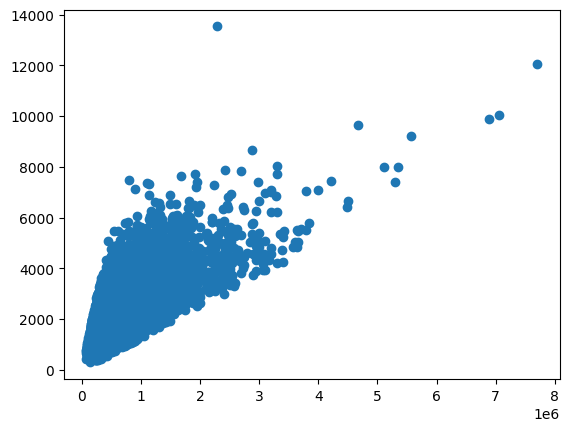

In [17]:
import matplotlib.pyplot as plt

plt.scatter(prices,sqft)
plt.show()

solamente para visualizar los datos

In [ ]:
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)

h = lambda X, t: X @ t

# gradient
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)